# TimeSeriesAnalysis-ARIMA
This project is aimed at doing time series forecast using AutoRegressive Integrated Moving Average, ARIMA. The dat sed is the air passenger dataset.

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
# load data
data = pd.read_csv('AirPassengers.csv')


In [6]:
# data exploration - visualization and wrangling
print(data.shape)
data.head()

(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


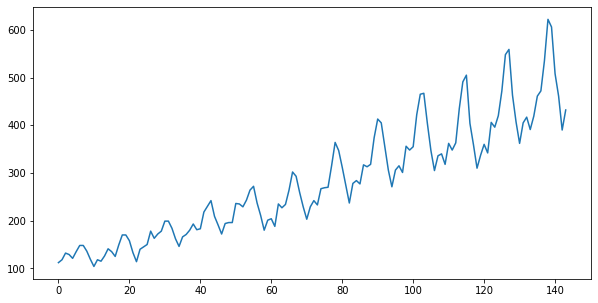

In [14]:
# visualise the time series
plt.figure(figsize=(10,5))
#import rcParams
#from matplotlib.pyplot import rcParams
#rcParamsParams['figure.figsize'] = 10, 5
plt.plot(data['#Passengers'])

In [15]:
data.Month[1]

'1949-02'

In [16]:
# parsing the date strings into datetime format i.e., date becomes the index
data['Month'] = pd.to_datetime(data.Month, infer_datetime_format=True)

# set months as the index
data = data.set_index('Month')
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [17]:
data.shape

(144, 1)

In [18]:
# renaming the column
#data.columns = ['passengers']
data = data.rename(columns={'#Passengers' : 'passengers'})
data.head()

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Number of air passengers')

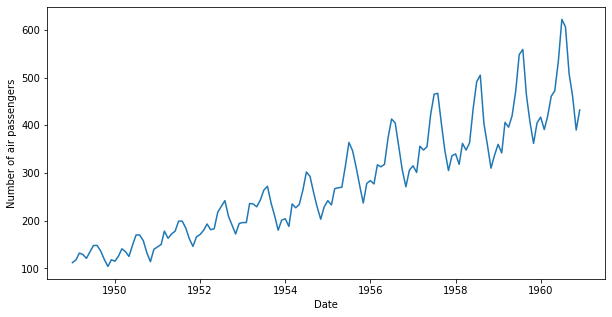

In [20]:
# plot the wrangled data
plt.figure(figsize=(10,5))
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Number of air passengers')